# Performing classification analysis on Wisconsin breast cancer data set using neural networks

In this notebook we will train a neural network on the Wisconsin breast cancer data set and TODO

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from feedforward_nn import NeuralNetwork
from gradient_descent import GradientDescent
from regression_tools import accuracy

from sklearn.datasets import load_breast_cancer as wbc
from sklearn.model_selection import train_test_split

In [100]:
# Load data
data = wbc()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, z_train, z_test = train_test_split(X, y, test_size=0.2)
n = X_train.shape[1]


In [132]:
def gradient_descent_execution(X, w0, z, model, max_iter = 200, eta = 0.01):
    batch_size = 10
    store_extra = True

    gd = GradientDescent(batch_size=batch_size, store_extra=store_extra, mode="adam")
    w = gd.train(X, w0, z, model, eta, max_iter)
    return w, gd

# Train neural network

layers = [n, 20, 10, 1]
nn = NeuralNetwork(layers, activation="sigmoid", output_activation="sigmoid", regularization=0.07)
w0 = nn.wb()

w, gd = gradient_descent_execution(X_train, w0, z_train, nn, max_iter=200, eta=0.01)
print("Train cost:", gd.costs[-1])
print("Test cost:", nn.cost(X_test, w, z_test))


Train cost: 0.23475140801239014
Test cost: 0.23346008749020555


In [133]:
# Test accuracy
z_pred = np.around(nn.predict(X_test, w).flatten())
print("Test accuracy:", accuracy(z_pred, z_test))
print("Predicted:", z_pred)
print("Actual:", z_test)

Test accuracy: 0.631578947368421
Predicted: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual: [1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 0 0 0]


We test the distribution of local minima by 

In [131]:
# This code snippet takes ~11 minutes to run with T = 100 and max_iter = 200
costs = []
T = 100
for _ in range(T):
    layers = [n, 20, 10, 1]
    nn = NeuralNetwork(layers, activation="sigmoid", output_activation="sigmoid", regularization=0.07)
    w0 = nn.wb()

    w, gd = gradient_descent_execution(X_train, w0, z_train, nn, max_iter=200, eta=0.01)
    costs.append(gd.costs[-1])

c:\Users\leand\FYS-STK\FYS-STK3155-project-2\feedforward_nn.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


KeyboardInterrupt: 

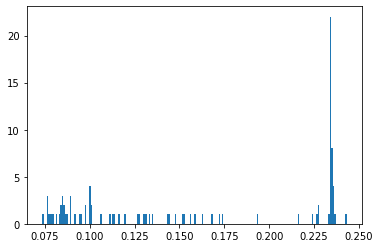

In [118]:
plt.hist(costs, bins=200)
plt.show()

We perform a gridsearch on the regularization parameter to find the best value. We use the test set to evaluate the performance of the model.

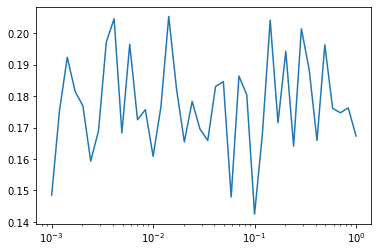

IndexError: index 65 is out of bounds for axis 0 with size 40

In [127]:
# This takes ~40 minute to run with 40 lambdas, avg_num = 10 and max_iter = 200
# Grid search on regularization parameter
lambdas = np.logspace(-3, 0, 40)
costs_lam = []
progress = 0
avg_num = 10
for l in lambdas:
    progress += 1/len(lambdas)
    print(f"Progress: {100*progress:.2f}%", end="\r")
    # Average over avg_num runs
    cost = 0
    for _ in range(avg_num):
        layers = [n, 20, 10, 1]
        nn = NeuralNetwork(layers, activation="sigmoid", output_activation="sigmoid", regularization=1)
        w0 = nn.wb()

        w, gd = gradient_descent_execution(X_train, w0, z_train, nn, max_iter=200, eta=0.01)
        cost += gd.costs[-1]
    cost /= avg_num
    costs_lam.append(cost)

plt.plot(lambdas, costs_lam)
plt.xscale("log")
plt.show()

print("Best lambda:", lambdas[np.argmin(costs_lam)])

Best lambda: 0.1
Second best lambda: 0.05878016072274915
Third best lambda: 0.001


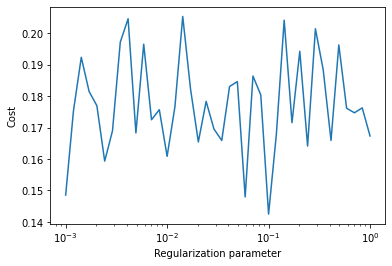

In [130]:
print("Best lambda:", lambdas[np.argmin(costs_lam)])
plt.plot(lambdas, costs_lam)
plt.xscale("log")
plt.xlabel("Regularization parameter")
plt.ylabel("Cost")
plt.show()
